Summary : Of all the Algorithms executed,Ridge converged with the best test score and other statistics are mentioned below:

Best Mean Cross-validation score: 0.16
Ridge parameters:  {'alpha': 1}

Ridge Test Performance:  0.1661922740152575
Ridge Train Performance:  0.16443711032081984

train mse: 911.3325557722592
train rmse: 30.188285075046235
train r2: 0.16443711032081987

test mse: 975.0983627592045
test rmse: 31.2265650169724
test r2: 0.1661922740152575

Additional Notes:
Algorithms which could not converge due to high computation usage - Polynomial-multiple,SVR(rbf,poly and sigmoid)
Tried Recursive Feature Elimination and used 9 to 15 important features but the accuracy did not increase.

#### Importing Libraries

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

#### Load Dataset

In [2]:
# load dataset
# your code here
data = pd.read_excel(r'\\PatentDataVariables.xlsx')


In [3]:
data.head(5)

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,156,54,0.65505,5.019564e+06,6,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,261,5,0.32000,5.578147e+06,0,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,32,28,0.63778,5.072923e+06,25,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,261,4,0.37500,5.787045e+06,1,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,553,7,0.24491,5.696489e+06,5,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


#### Identifying variables 

In [5]:
##ength of data:

print('Number of patents in the Dataset: ', len(data))

Number of patents in the Dataset:  65535


In [6]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')

There are 0 categorical variables


In [7]:
# make a list of the numerical variables first= Hint data type != O
numerical = [var for var in data.columns if data[var].dtype!='O']

print(f'There are {len(numerical)} numerical variables')

There are 25 numerical variables


In [8]:
# let's visualise the values of the discrete variables
discrete = [var for var in numerical if len(data[var].unique()) < 20]

print(f'There are {len(discrete)} discrete variables')

There are 3 discrete variables


In [145]:
discrete

['lag_y', 'ay', 'FT']

In [9]:
# find continuous variables- hint numerical variables not in discrete and  year_years 
# Also remove the Id variable and the target variable SalePrice
# which are both also numerical

continuous = [var for var in numerical if var not in discrete and var not in ['fwd']]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 25 numerical and continuous variables


#### Correlation plot

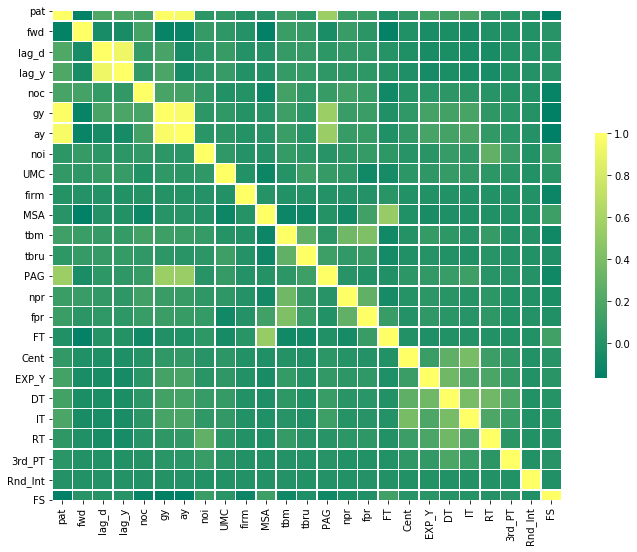

In [10]:
#Correlation map to see how features are correlated with fwd
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='summer', square=True,linewidths=.5, cbar_kws={"shrink": .5})

#### We can drop lag_y column

In [10]:
data=data.drop(['lag_y'], axis=1)

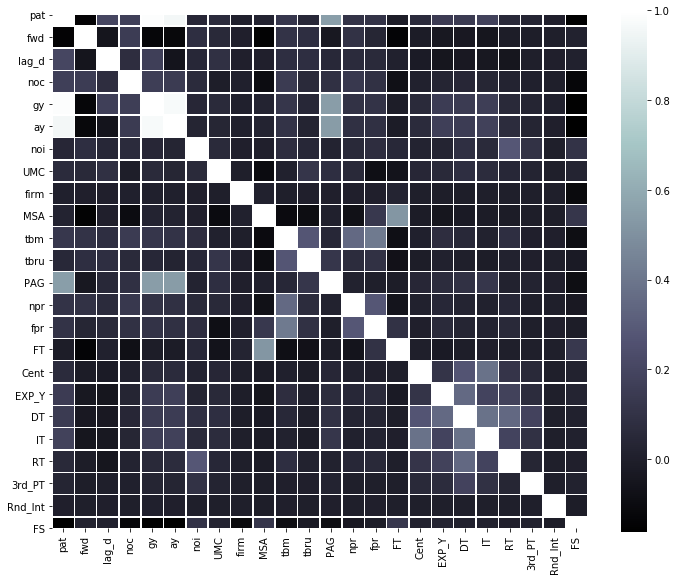

In [12]:
#Correlation map to see how features are correlated with fwd
corrmat = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, cmap='bone', square=True,linewidths=.5, cbar_kws={"shrink": .8})

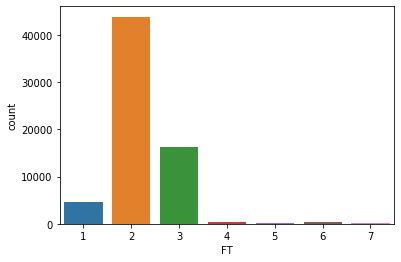

In [13]:
sns.countplot(x='FT', data=data);

As per the plot, 2:US non Government organization had maximum number of patents, around 42k.

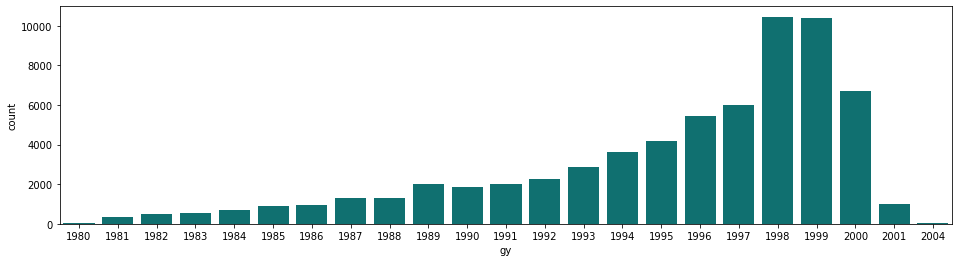

In [14]:
plt.figure(figsize=(16,4))
sns.countplot(x="gy", color='teal',data=data)
plt.show()

We observed that maximum number of patents were granted in year 1998 and 1999.

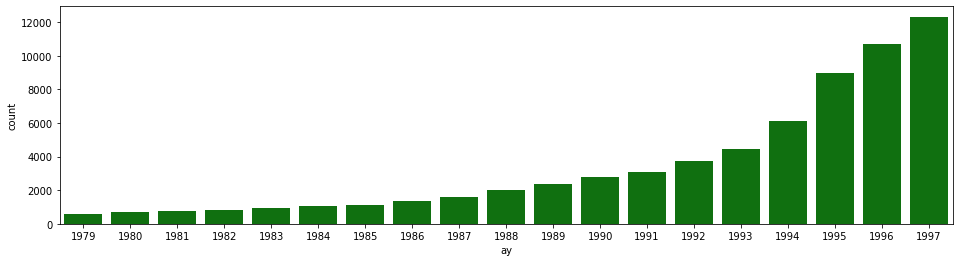

In [15]:
plt.figure(figsize=(16,4))
sns.countplot(x='ay', color='green', data=data)
plt.show()

Maximum number of patents were applied in 1997.

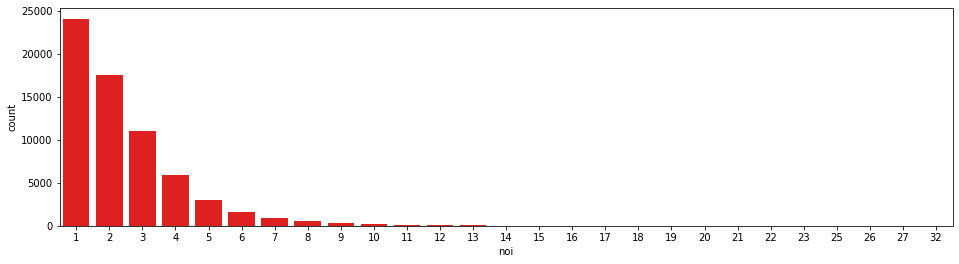

In [16]:
plt.figure(figsize=(16,4))
sns.countplot(x='noi', color='red',data=data)
plt.show()

In [17]:
data.groupby(['noi']).fwd.sum()

noi
1     587036
2     458405
3     308686
4     174115
5      93295
6      51710
7      31835
8      17421
9       9251
10      6726
11      3696
12      2994
13      1789
14      1265
15       658
16       515
17       343
18       835
19       190
20       192
21       227
22       259
23        98
25        78
26        85
27        85
32        14
Name: fwd, dtype: int64

Single contribution is maximum in submitting a patent.

In [18]:
data.groupby(['FT']).fwd.sum()

FT
1     145259
2    1310287
3     273386
4      10599
5       2021
6       8934
7       1317
Name: fwd, dtype: int64

Number of forward citations received by US non Government Organizations are maximum.

#### Distribution of number of claims

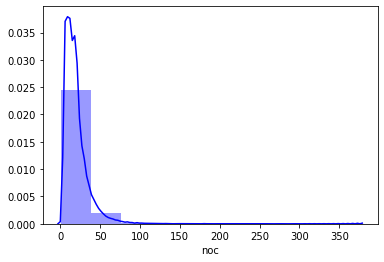

In [19]:
sns.distplot(data.noc, color='blue',kde=True,bins=10);

#### Recursive Feature Elimination using RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


X = data.drop('fwd', axis=1)
X = data.drop('FS', axis=1)
target = data['fwd']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [24]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


In [25]:
print(np.where(rfecv.support_ == False)[0])

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


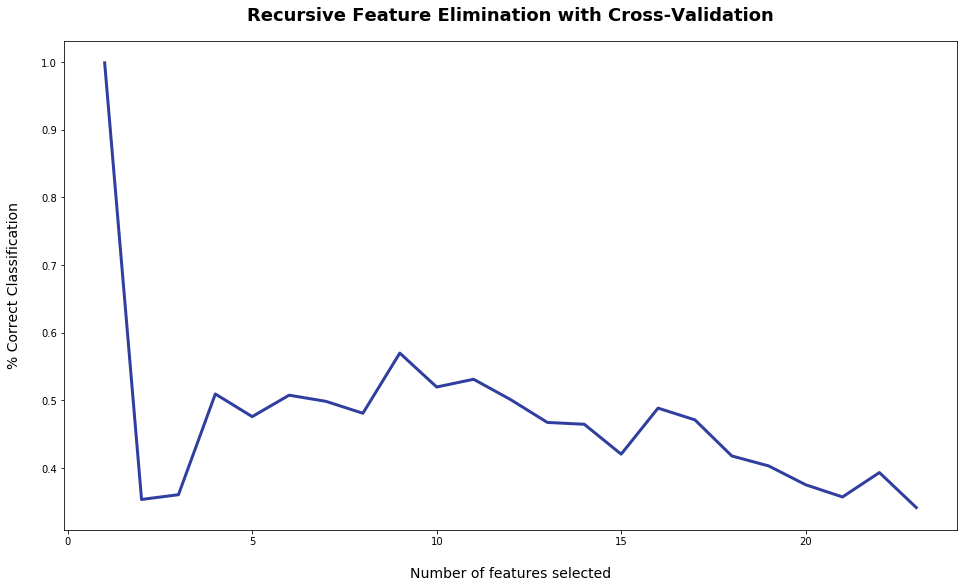

In [26]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

Feature importance is maximum or correct classification is 0.6 at 9 variables

In [30]:
data1 = data.drop('pat', axis=1)

#### Feature Importance

[0.07837771 0.07670413 0.04726787 0.04075188 0.04618966 0.06984159
 0.06261118 0.05792222 0.07085226 0.06840026 0.07631528 0.05495375
 0.03942144 0.0142069  0.01907554 0.04902864 0.03243383 0.02245769
 0.0196872  0.00271258 0.05078837]


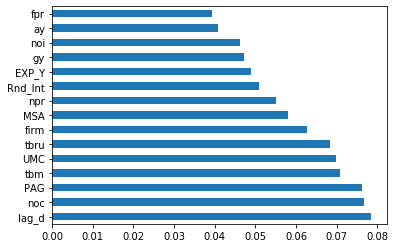

In [32]:
X = data1.iloc[:,1:22]  #independent columns
y = data1.iloc[:,0]    #target column i.e fwd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Split the data into Train and Test

In [11]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.25,
                                                    random_state=0)

X_train.shape, X_test.shape

((49151, 23), (16384, 23))

In [12]:
categorical=['gy','ay','firm','UMC','MSA','FT']

In [13]:
continuous=list(set(list(data.columns))-set(categorical))

In [14]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [15]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 24 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(14)
memory usage: 12.0 MB


In [17]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine import discretisers as dsc

In [18]:
'''
patent_preprocess = Pipeline([
    
    # missing data imputation 
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical + discrete)),
     
    # Transforming Numerical Variables
    #('yjt', YeoJohnsonTransformer(variables = ['FS'])),

    
    # discretisation and encoding
    #('treeDisc',  DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                                   #regression=True,
                                   #param_grid={'max_depth': [1,2,3,4,5,6]})),
    
       # discretisation and encoding
    ('discretisation', dsc.EqualWidthDiscretiser(
       bins=30, return_object=True, variables=continuous)),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    ])

patent_preprocess = Pipeline([
    
    # missing data imputation 
   # ('missing_ind', mdi.AddNaNBinaryImputer(
        #variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    #('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
        # variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    #('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical)),
     
    # Transforming Numerical Variables
    ('yjt', YeoJohnsonTransformer(variables = ['noc','tbm','npr','lag_d'])),

    
    # discretisation and encoding
   ('treeDisc',  DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error',
                                  regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]})),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    
])
'''
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['FS'])),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
     
])

In [96]:
X_train.head(5)

,pat,lag_d,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
35921,5450492,1047,21,1995,1992,2,380,699321,538,8,0.59376,5.087656e+06,0,10,3,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,NaN
4119,5983295,739,12,1999,1997,1,710,596125,142,3,0.66667,5.539236e+06,0,0,2,0.0,0.0,0.00000,0.0,0.00000,0.0,0.05382,32.0
58294,4470022,803,8,1984,1982,5,331,597270,260,5,0.32000,3.710826e+06,0,0,6,0.0,0.8,0.00000,0.0,0.20000,0.0,0.00000,NaN
36067,5446912,608,34,1995,1993,2,712,278220,238,4,0.00000,4.998625e+06,9,0,2,0.0,3.0,1.50000,0.0,0.00000,0.0,0.13345,25.0
12510,5860861,705,12,1999,1997,3,463,0,51,17,0.73357,5.015979e+06,0,0,4,0.0,2.0,0.66666,0.0,0.33333,0.0,0.00000,NaN


In [19]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'ay', 'firm', 'UMC',
                                                     'MSA', 'FT']))],
         verbose=False)

In [20]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [43]:
# Train a linear regression model, report the coefficients and model performance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print()
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check train data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))

# check test data set performance
print("LR Performance Test: ", lr.score(X_test,y_test))

Mean Cross-validation scores: [0.15920034 0.16007282 0.14964755]

lr.coef_: [-1.40028510e-05 -2.76455330e-03  2.92540197e-01  1.47944765e+00
  9.18654933e-02  5.00282429e+00  2.04537648e-06  1.40919346e-01
  2.41967374e-01 -9.71512217e-02 -1.15089963e-01 -1.22607065e-01
  3.44724717e-04 -7.21109854e-01 -3.29783367e+00 -1.05350740e-02
  9.64932032e-03  5.37467518e+00  2.05439234e+00 -7.98825092e+00
  4.70045634e+00 -9.24122385e+00 -3.02318072e+00  6.71892190e+00
  3.08795212e+00  2.86237571e-01  4.10577828e+00  1.08537866e+00
  2.01647707e+00  3.31320797e+00  3.72612784e-02  8.35967918e+00
 -6.85262533e+00 -8.07597563e-01 -2.99223120e+00 -1.02353083e+01
 -2.39271673e+00 -5.60431709e+00  3.53747894e+00 -3.02927035e+00
 -2.04781999e+00  1.61112462e+00  5.34660500e+00 -3.44826127e-01
 -3.70158225e+00 -4.07386021e+00  6.07934470e-01 -1.59938376e+00
  1.22767029e+00  6.45200728e-01 -3.89171402e+00  1.35042028e+00
  3.17476486e+00  6.62450634e+00  2.55978498e+00  1.47749651e-01
 -1.12269368e+

In [26]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.01, 0.1, 1] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=10, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

# Check train data set performance

print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))

# let's get the predictions
X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

Best Mean Cross-validation score: 0.16

Ridge parameters:  {'alpha': 1}
Ridge.coef_: [-1.44935250e-05 -2.57948017e-03  2.92577207e-01  1.47940241e+00
  9.19050881e-02  5.00110283e+00  2.04685669e-06  1.40894708e-01
  2.42004634e-01 -4.84583931e-02 -1.15454627e-01 -1.22681044e-01
  3.43039464e-04 -7.21250283e-01 -3.28649641e+00 -1.05422460e-02
  9.63574664e-03  5.22429166e+00  1.89301311e+00 -7.67490203e+00
  4.53424966e+00 -8.92805831e+00 -2.85433366e+00  6.58707092e+00
  2.91537315e+00  3.40988038e-01  4.02650755e+00  1.08750759e+00
  1.97319721e+00  3.13743543e+00 -1.07628339e-01  8.24910367e+00
 -6.62513543e+00 -9.40929190e-01 -2.88531384e+00 -9.95243718e+00
 -2.04806631e+00 -4.93838881e+00  3.01174647e+00 -2.61688442e+00
 -1.56932956e+00  1.02642736e+00  4.90017002e+00 -9.76837424e-01
 -3.42831744e+00 -3.53480361e+00  6.31394736e-01 -1.40282013e+00
  1.34042245e+00  3.27525300e-02 -3.28790544e+00  1.09468925e+00
  3.10129268e+00  6.26697871e+00  2.39747894e+00  1.51929827e-01
 -1.1

In [102]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)
import warnings
warnings.filterwarnings('ignore')

#define a list of parameters
param_lasso = {'alpha':[0.01, 0.1, 1] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=10, return_train_score = True)
grid_lasso.fit(X_train, y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

# Check train data set performance
print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))


# check model performance:

# let's get the predictions
X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)


Best Mean Cross-validation score: 0.16

Lasso parameters:  {'alpha': 0.01}
Lasso.coef_: [-1.51151607e-05 -2.03593575e-03  2.94347749e-01  1.46771763e+00
  9.33426537e-02  4.87039050e+00  2.08442164e-06  1.41446750e-01
  2.41761965e-01  0.00000000e+00 -1.20978621e-01 -1.32487345e-01
  2.51497655e-04 -7.03151564e-01 -1.57951200e+00 -9.84110478e-03
  9.09189690e-03  2.46829975e+00 -1.01111395e+00 -5.49559895e+00
  1.66196801e+00 -9.35831936e+00 -0.00000000e+00  3.99177804e+00
 -0.00000000e+00  1.13554282e+00  2.22857225e+00  7.64961847e-01
  7.84313572e-01  1.07784260e-01 -2.98594555e+00  5.91003818e+00
 -2.61653268e+00 -3.27599258e+00 -4.93315665e-01 -6.59675430e+00
  1.87639522e-01 -1.77771547e+00 -5.52448588e-02  0.00000000e+00
  1.15630048e+00 -6.16786763e-01  0.00000000e+00 -3.39912780e-01
 -1.13690173e+00 -5.37006703e-01  3.52889359e-01  0.00000000e+00
  2.03644282e+00 -0.00000000e+00 -2.24319402e-01 -1.32314587e+00
  1.63347234e+00  1.83436232e+00  0.00000000e+00  6.29602602e-01
 -

In [104]:
# Train a ElasticNet regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
Elasticnet = ElasticNet()

#define a list of parameters
param_Enet = {'alpha':[0.01, 0.1, 1],
             'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

grid_Enet = GridSearchCV(Elasticnet, param_Enet, cv=10, return_train_score = True)
grid_Enet.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_Enet.best_score_))
print()

#find best parameters
print('Enet parameters: ', grid_Enet.best_params_)

# print co-eff

print("Enet.coef_:", grid_Enet.best_estimator_.coef_)
print("Enet.intercept_:", grid_Enet.best_estimator_.intercept_)

# Check test data set performance
print("Enet Test Performance: ", grid_Enet.score(X_test,y_test))

# Check train data set performance
print("Enet Train Performance: ", grid_Enet.score(X_train,y_train))

Best Mean Cross-validation score: 0.16

Enet parameters:  {'alpha': 0.01, 'l1_ratio': 1}
Enet.coef_: [-1.51151607e-05 -2.03593575e-03  2.94347749e-01  1.46771763e+00
  9.33426537e-02  4.87039050e+00  2.08442164e-06  1.41446750e-01
  2.41761965e-01  0.00000000e+00 -1.20978621e-01 -1.32487345e-01
  2.51497655e-04 -7.03151564e-01 -1.57951200e+00 -9.84110478e-03
  9.09189690e-03  2.46829975e+00 -1.01111395e+00 -5.49559895e+00
  1.66196801e+00 -9.35831936e+00 -0.00000000e+00  3.99177804e+00
 -0.00000000e+00  1.13554282e+00  2.22857225e+00  7.64961847e-01
  7.84313572e-01  1.07784260e-01 -2.98594555e+00  5.91003818e+00
 -2.61653268e+00 -3.27599258e+00 -4.93315665e-01 -6.59675430e+00
  1.87639522e-01 -1.77771547e+00 -5.52448588e-02  0.00000000e+00
  1.15630048e+00 -6.16786763e-01  0.00000000e+00 -3.39912780e-01
 -1.13690173e+00 -5.37006703e-01  3.52889359e-01  0.00000000e+00
  2.03644282e+00 -0.00000000e+00 -2.24319402e-01 -1.32314587e+00
  1.63347234e+00  1.83436232e+00  0.00000000e+00  6.29

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#apply polynomial regression in pipeline
#pipe_poly = make_pipeline(PolynomialFeatures(),MinMaxScaler(), LinearRegression())
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())
    
])
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,2)}

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')


grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# check model performance:

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)

Best Mean Cross-validation score: -921.20

train mse: 911.3321424010899
train rmse: 30.18827822849607
train r2: 0.1644374893236401

test mse: 975.1034467963618
test rmse: 31.226646422508484
test r2: 0.16618792664926563
Best parameters:  {'polynomialfeatures__degree': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)
from sklearn.linear_model import Ridge
ridge = Ridge()

#apply polynomial regression in pipeline
#pipe_poly = make_pipeline(PolynomialFeatures(),MinMaxScaler(), LinearRegression())
#pipe_poly=Pipeline([ 
    #('polynomialfeatures', PolynomialFeatures()),
    #('scaler',MinMaxScaler()),
    #('norm_reg', LinearRegression())
    
#])
#define a list of parameters
#param_poly = {'polynomialfeatures__degree':range(1,2)}


pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=2))
    ,('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')


grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly.best_score_))
print()

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)


In [24]:
# Train a KNN regression model, report the coefficients, the best parameters, and model performance 

import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import GridSearchCV


# Train a KNN model for regression, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

knn = KNeighborsRegressor()

# define a list of parameters

param_knn = {'n_neighbors': range(1,7),
            'weights':['uniform'],
            'algorithm':['auto'],
            'leaf_size':[10,20]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check train data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))


Best Mean Cross-validation score: -0.12

KNN parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'uniform'}
KNN Train Performance:  0.1929190027930117
KNN Test Performance:  -0.10160022577034544


In [28]:
# Train a SGD Linear regression model, report the coefficients, the best parameters, and model performance 

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

sgd = SGDRegressor()

##param_sgd = {max_iter=50, penalty=None, eta0=0.1}

param_sgd = {
    'alpha': [0.0001],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['optimal'],
    'max_iter':[100], 'penalty':['None'], 'eta0':[0.1]
}

#apply grid search
grid_sgd = GridSearchCV(sgd, param_sgd, cv=5, return_train_score=True)
grid_sgd.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_sgd.best_score_))
print()

#find best parameters
print('SGD parameters: ', grid_sgd.best_params_)

# Check train data set performance
print("SGD Train Performance: ", grid_sgd.score(X_train,y_train))

# Check test data set performance
print("SGD Test Performance: ", grid_sgd.score(X_test,y_test))

Best Mean Cross-validation score: -57926851763724232.00

SGD parameters:  {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 100, 'penalty': 'None'}
SGD Train Performance:  -9.859042923907144e+16
SGD Test Performance:  -9.190451132477949e+16


In [ ]:
# Train a SVM regression model, report the coefficients, the best parameters, and model performance 


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


svr = SVR()
param_svr = {'kernel': ['poly'], 'C':[1],'gamma': [1e-7, 1e-1],'epsilon':[0,0.1,0.2,0.5,0.3]}

#apply grid search
grid_svr = GridSearchCV(svr, param_svr, cv=10, return_train_score=True)
grid_svr.fit(X_train, y_train)

#find best parameters
print('SVR parameters: ', grid_svr.best_params_)

# Check train data set performance
print("SVR Train Performance: ", grid_svr.score(X_train,y_train))

# Check test data set performance
print("SVR Test Performance: ", grid_svr.score(X_test,y_test))

In [30]:
# Train a SVM regression model, report the coefficients, the best parameters, and model performance 


from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV


svr = LinearSVR()
param_svrlinear = {'tol': [1e-4], 'C':[1],'max_iter': [1000],'epsilon':[0]}

#apply grid search
grid_svr = GridSearchCV(svr, param_svrlinear, cv=10, return_train_score=True)
grid_svr.fit(X_train, y_train)

#find best parameters
print('SVR parameters: ', grid_svr.best_params_)

# Check train data set performance
print("SVR Train Performance: ", grid_svr.score(X_train,y_train))

# Check test data set performance
print("SVR Test Performance: ", grid_svr.score(X_test,y_test))

SVR parameters:  {'C': 1, 'epsilon': 0, 'max_iter': 1000, 'tol': 0.0001}
SVR Train Performance:  -0.5070399461602875
SVR Test Performance:  -0.48135362134478266


In [23]:
# Train a Decision Tree regression model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,15)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree Regressor parameters: ', grid_dtree.best_params_)

# Check train data set performance
print("Decision Tree Regressor Train Performance: ", grid_dtree.score(X_train,y_train))

# Check test data set performance
print("Decision Tree Regressor Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.08

Decision Tree Regressor parameters:  {'max_depth': 5}
Decision Tree Regressor Train Performance:  0.11817371862582349
Decision Tree Regressor Test Performance:  0.07999412702169395
